In [1]:
#Multiclass Classification with LeNet and AlexNet

In [8]:
#Import Libraries
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import AveragePooling2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization,Dropout
from keras.layers import Conv2D
from keras.optimizers import Adadelta

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Import Keras library for CIFAR-10 dataset
from keras.datasets import cifar10

In [10]:
#Download CIFAR dataset
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 200s 1us/step


In [11]:
#Show the shape of the dataset
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (50000, 32, 32, 3)
X_test: (10000, 32, 32, 3)
y_train: (50000, 1)
y_test: (10000, 1)


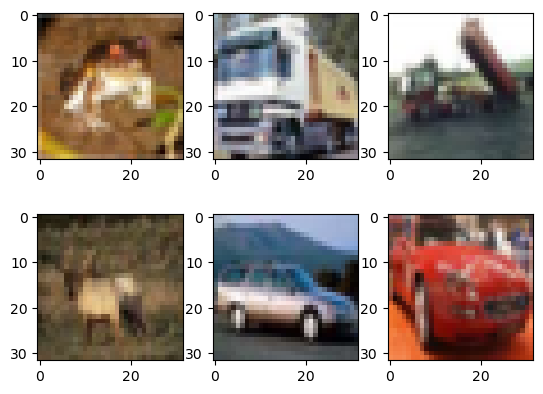

In [16]:
#Show the first 6 images
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i])

In [17]:
#Show the range of image data
print('X_train range',np.ptp(X_train))
print('X_test range',np.ptp(X_test))

X_train range 255
X_test range 255


In [18]:
#Normalize image data

In [19]:
#Convert data to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [20]:
#Divide image data by 255
X_train/=255
X_test/=255

In [21]:
#Check if the image datasets are properly normalized
print('Normalized X_train range:',np.ptp(X_train))
print('Normalized X_test range:',np.ptp(X_test))

Normalized X_train range: 1.0
Normalized X_test range: 1.0


In [22]:
#Check the number of classes
print('N of classes:y_train=',np.unique(y_train).size)
print('N of classes:y_test=',np.unique(y_test).size)

N of classes:y_train= 10
N of classes:y_test= 10


In [23]:
#Apply one-hot encoding to label data

In [24]:
#The number of classes
num_classes=10

In [26]:
#One-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [27]:
#Check if the labels are one-hot encoded properly
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [28]:
#Set input shape:height,width,colors
img_rows,img_cols,channels = 32,32,3
input_shape = (img_rows,img_cols,channels)

In [33]:
#Create LeNet-5 model
lenet_model = Sequential()
lenet_model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),
                padding='same',activation='tanh',input_shape=input_shape))
lenet_model.add(AveragePooling2D((2,2),strides=(2,2)))
lenet_model.add(Conv2D(16,kernel_size=(5,5),strides=(1,1),
                padding='valid',activation='tanh'))
lenet_model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
lenet_model.add(Flatten())
lenet_model.add(Dense(120,activation='tanh'))
lenet_model.add(Dense(84,activation='tanh'))
lenet_model.add(Dense(num_classes,activation='softmax'))

lenet_model.compile(
                    loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.Adadelta(),
                    metrics=['accuracy']  
)

d:\Anaconda\envs\keras_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
#Model Summary
print(lenet_model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 16, 16, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
#Model Training 
l_history = lenet_model.fit(X_train,y_train,
                            batch_size=128,
                            epochs=12,
                            verbose=1,
                            validation_data=(X_test,y_test))

Epoch 1/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.1002 - loss: 2.3445 - val_accuracy: 0.1004 - val_loss: 2.3145
Epoch 2/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1022 - loss: 2.3077 - val_accuracy: 0.1072 - val_loss: 2.2923
Epoch 3/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1149 - loss: 2.2881 - val_accuracy: 0.1338 - val_loss: 2.2786
Epoch 4/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1416 - loss: 2.2750 - val_accuracy: 0.1475 - val_loss: 2.2679
Epoch 5/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1562 - loss: 2.2646 - val_accuracy: 0.1565 - val_loss: 2.2580
Epoch 6/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.1623 - loss: 2.2559 - val_accuracy: 0.1661 - val_loss: 2.2483
Epoch 7/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.1730 - loss: 2.2460 - val_accuracy: 0.1775 - val_loss: 2.2384
Epoch 8/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.1820 - loss: 2.2363 - val_ac

Text(0, 0.5, 'Accuracy')

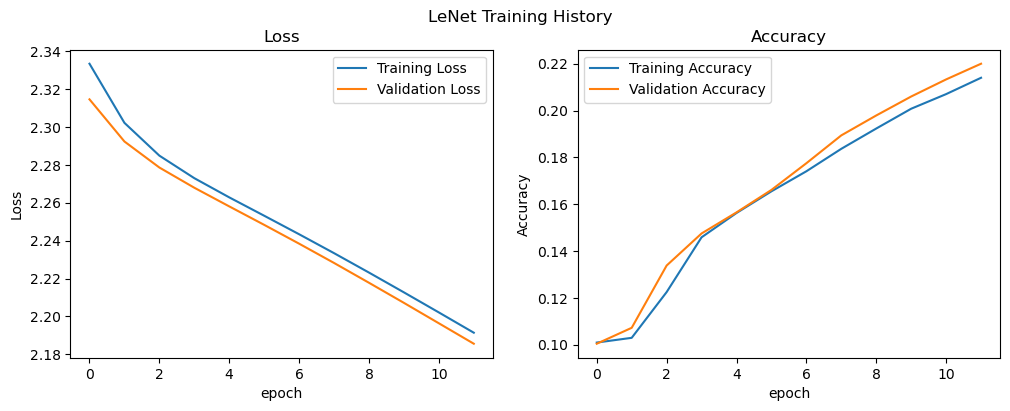

In [39]:
#Visualize training history
plt.figure(figsize=(12,4))
plt.suptitle('LeNet Training History')

#Loss
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(l_history.history['loss'],label='Training Loss')
plt.plot(l_history.history['val_loss'],label='Validation Loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('Loss')

#Accuracy
plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(l_history.history['accuracy'],label='Training Accuracy')
plt.plot(l_history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('Accuracy')


In [48]:
#Making prediction 
y_probs = lenet_model.predict(X_test)  
lenet_y_pred = np.argmax(y_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


[Text(0.5, 1.0, 'LeNet Confusion Matrix:Frequency')]

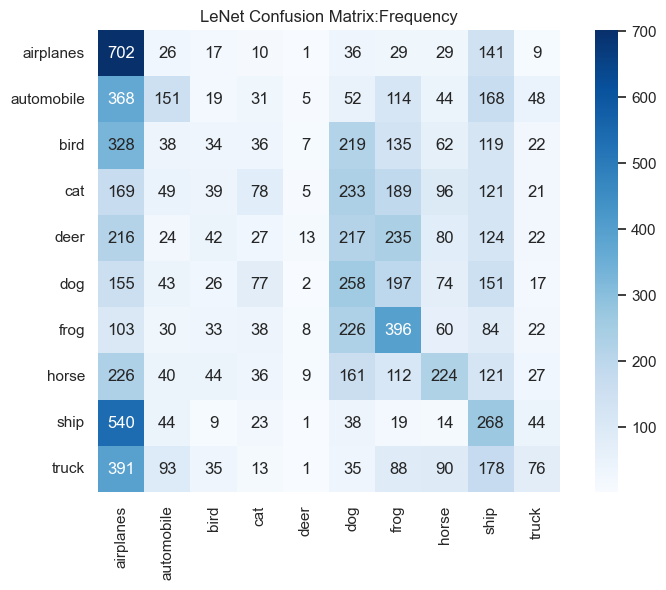

In [52]:
#   Create Confusion matrix with frequency
cm = confusion_matrix(y_true, lenet_y_pred)

labels = ['airplanes','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#Set class names to be displayed
cm = pd.DataFrame(cm,
                  index=labels,
                  columns=labels)

sns.set(rc={'figure.figsize':(9,6)})
sns.heatmap(cm,
            square=True,
            cbar=True,
            annot=True,
            cmap='Blues',
            fmt='d').set(title='LeNet Confusion Matrix:Frequency')

In [53]:
#Create Confusion matrix with probability

[Text(0.5, 1.0, 'LeNet Confusion Matrix:Probability')]

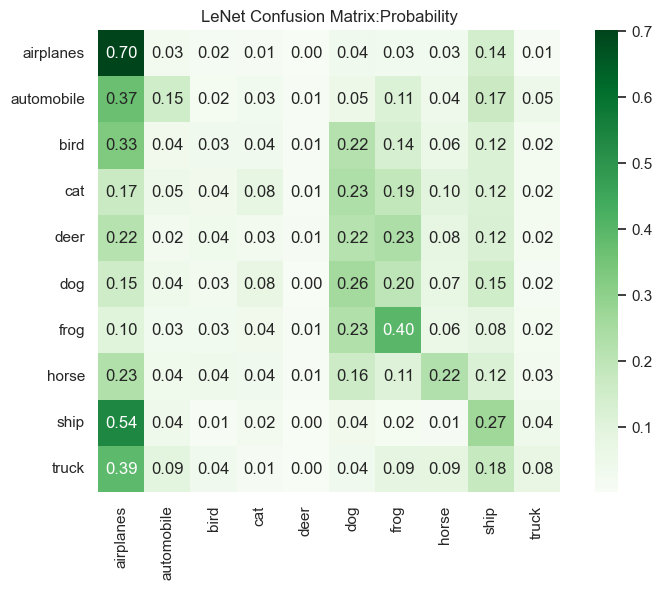

In [55]:
#compute the row probbability
cmp = cm.astype('float')/ np.array(cm.sum(axis=1))[:,np.newaxis]

cmp = pd.DataFrame(cmp,
                   index=labels,
                   columns=labels)

sns.set(rc={'figure.figsize':(9,6)})
sns.heatmap(cmp,
            square=True,
            cbar=True,
            annot=True,
            cmap='Greens',
            fmt='.2f').set(title='LeNet Confusion Matrix:Probability')

In [56]:
#Show the test loss and accuracy
score=lenet_model.evaluate(X_test,y_test,verbose=0)
print('Lenet:Loss and Accuracy')
print(f'Test loss score :{score[0]:.3f}')
print(f'Test accuracy score:{score[1]:.3f}')

Lenet:Loss and Accuracy
Test loss score :2.186
Test accuracy score:0.220


In [57]:
# Create Alexnet model
alex_model = Sequential()
alex_model.add(Conv2D(96, kernel_size=(11, 11),
                      strides=(4, 4), padding='same',
                      activation='relu',
                      input_shape=input_shape))
alex_model.add(MaxPooling2D(pool_size=(3, 3),
                            strides=(2,2), padding='same'))
alex_model.add(BatchNormalization())
alex_model.add(Conv2D(256, kernel_size=(5, 5),
                      strides=(1, 1), padding='same',
                      activation='relu'))
alex_model.add(MaxPooling2D(pool_size=(3, 3),
                            strides=(2,2), padding='same'))
alex_model.add(BatchNormalization())
alex_model.add(Conv2D(384, kernel_size=(3, 3),
                      strides=(1, 1), padding='same',
                      activation='relu'))
alex_model.add(Conv2D(384, kernel_size=(3, 3),
                      strides=(1, 1), padding='same',
                      activation='relu'))
alex_model.add(Conv2D(256, kernel_size=(3, 3),
                      strides=(1, 1), padding='same',
                      activation='relu'))
alex_model.add(MaxPooling2D(pool_size=(3, 3),
                            strides=(2,2), padding='same'))
alex_model.add(BatchNormalization())

alex_model.add(Flatten())
alex_model.add(Dense(2048, activation='relu'))
alex_model.add(Dropout(0.5))
alex_model.add(Dense(2048, activation='relu'))
alex_model.add(Dropout(0.5))
alex_model.add(Dense(num_classes,
                     activation='softmax'))

alex_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(),
    metrics=['accuracy']
)


d:\Anaconda\envs\keras_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
alex_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 96)       │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 4, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 2, 2, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 2, 2, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2048)           │       526,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,492,810 (32.40 MB)

 Trainable params: 8,491,594 (32.39 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [60]:
#Fit Alexnet model and store the training progress
a_history = alex_model.fit(X_train,y_train,
                           batch_size=128,
                           epochs=12,
                           verbose=1,
                           validation_data=(X_test,y_test))

Epoch 1/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 148s 356ms/step - accuracy: 0.1097 - loss: 2.4119 - val_accuracy: 0.1262 - val_loss: 2.2825
Epoch 2/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 124s 316ms/step - accuracy: 0.1627 - loss: 2.2699 - val_accuracy: 0.2694 - val_loss: 2.0815
Epoch 3/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 113s 288ms/step - accuracy: 0.2080 - loss: 2.1684 - val_accuracy: 0.2995 - val_loss: 1.9824
Epoch 4/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 116s 295ms/step - accuracy: 0.2321 - loss: 2.0859 - val_accuracy: 0.3213 - val_loss: 1.9118
Epoch 5/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 114s 292ms/step - accuracy: 0.2618 - loss: 2.0193 - val_accuracy: 0.3409 - val_loss: 1.8540
Epoch 6/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 108s 277ms/step - accuracy: 0.2852 - loss: 1.9541 - val_accuracy: 0.3578 - val_loss: 1.8049
Epoch 7/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 272ms/step - accuracy: 0.3033 - loss: 1.9055 - val_accuracy: 0.3718 - val_loss: 1.7621
Epoch 8/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 272ms/step - accuracy: 0.3223 -

Text(0, 0.5, 'Accuracy')

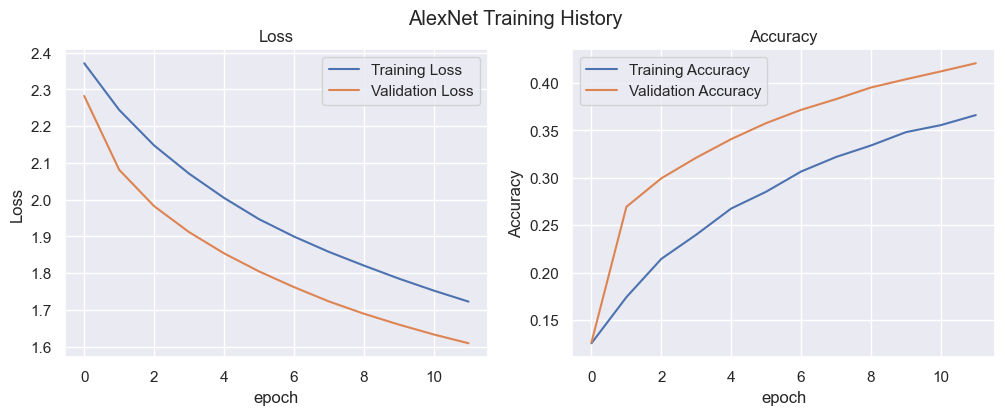

In [61]:
# Visualize the results
plt.figure(figsize=(12,4))
plt.suptitle('AlexNet Training History')

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(a_history.history['loss'], label='Training Loss')
plt.plot(a_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(a_history.history['accuracy'], label='Training Accuracy')
plt.plot(a_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('Accuracy')


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


[Text(0.5, 1.0, 'AlexNet Confusion Matrix: Frequency')]

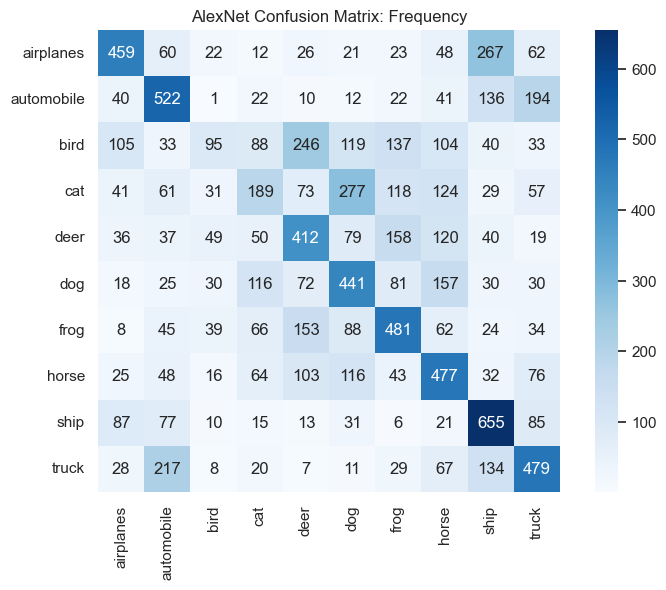

In [63]:
# Making prediction
alex_y_pred = np.argmax(alex_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Create Confusion matrix with frequency
cm = confusion_matrix(y_true, alex_y_pred)

# Set class names to be displayed
cm = pd.DataFrame(cm,
                  index=labels,
                  columns=labels)

sns.set(rc={'figure.figsize':(9, 6)})
sns.heatmap(cm,
            square=True, cbar=True, annot=True,
            cmap='Blues',
            fmt='.0f').set(title='AlexNet Confusion Matrix: Frequency')


In [64]:
# Show the test loss and accuracy
score = alex_model.evaluate(X_test, y_test, verbose=0)
print('AlexNet: Loss and Accuracy')
print(f'Test loss score    : {score[0]:.3f}')
print(f'Test accuracy score: {score[1]:.3f}')


AlexNet: Loss and Accuracy
Test loss score    : 1.609
Test accuracy score: 0.421
